In [1]:
from astropy.table import Table
import numpy as np
import math
import astropy.units as u

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8)
plt.rcParams['font.size'] = 18
mpl.ticker.AutoLocator.default_params['nbins'] = 5
mpl.ticker.AutoLocator.default_params['prune'] = 'both'

mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True

In [64]:
nsa = Table.read('matched_fits/nsa_matched.fits')
nsa = nsa[nsa['mask'] == True]

Exception ignored in: Exception ignored in: <bound method FITS_rec.__del__ of FITS_rec([ (84, 179.04303355637882, 60.522607243909285, -1.0, -1.0, -1.0, -1.0, 83726.0, -1.0, 13.199999809265137, 0.03317632898688316, 0.18000000715255737, 2989.0, 5.0, 22.0, 302.79278564453125, 840.9096069335938, 0.03357681259512901, 0.03357681259512901, 0.000500346883200109, 160772.0, array([   467.81765747,    904.96490479,   2109.05761719,   5995.24707031,
        10346.84277344,  14186.58203125,  17454.13671875]), array([  1.33808411e-03,   7.16096489e-04,   1.01577032e-04,
         8.18670669e-05,   2.74965514e-05,   1.46227712e-05,
         4.28838666e-06]), 1.0, array([   489.23858643,    850.59075928,   2233.69067383,   6022.70019531,
        10299.48925781,  13927.44628906,  18016.73632812]), array([-19.23956108, -19.98963928, -20.94530678, -22.05554962,
       -22.64118385, -22.96678352, -23.19131851]), array([  248.42079163,   497.49230957,   383.28668213,  2496.17333984,
        2497.15356445,  

In [285]:
def Mag_to_L(Mag):
    '''
    Code for converting from absolute magnitude -> luminosity.
    
    Inputs:
    -------
    Mag: absolute magnitude
    
    Outputs:
    --------
    L: luminosity (in ergs/s/Hz)
    '''
    
    K = 4*math.pi*(10*u.pc)**2 #4pi(D**2)
    S_Jy = 10**((27.5-Mag)/2.5)*1e-6*u.Jy
    L = K*S_Jy
    return L.to(u.erg/u.s/u.Hz)

In [286]:
fuv_mags = nsa['ABSMAG'][:,0]
L_fuv = Mag_to_L(fuv_mags)
sfr = (6.84e-29)*L_fuv # chabrier, Salim+2007

In [287]:
fuv_fs = nsa['RNMGY'][:,0]
L = f_to_L(fuv_fs)

[  1.34739352e+08   4.32171728e+07   5.01394574e+06 ...,   2.74602207e+07
   8.43536227e+04   1.10957252e+07] Jy


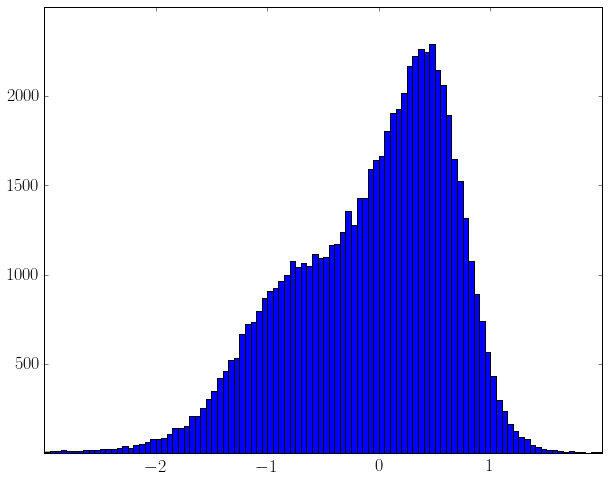

In [288]:
_ = plt.hist(np.log10(sfr.data),bins=np.linspace(-3,2,101))